# Import OpenCV2

In [1]:
import cv2
import uuid
import os
import time
import pandas as pd
import numpy as np

In [2]:
labels = ['smile', 'thumbsup']
number_imgs = 0

In [3]:
IMAGES_PATH = os.path.join('Workspace', 'Images', 'Collected_Images')

In [4]:
if not os.path.exists(IMAGES_PATH):
    !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

# 1. Image Capturing

In [41]:
for label in labels:
    cap = cv2.VideoCapture(0)
    print('Collection Images for {}'.format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        print('Collecting Image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label, label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frmae', frame)
        time.sleep(2)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Collection Images for smile
Collection Images for thumbsup


In [40]:
cap.release()
cv2.destroyAllWindows()

# 2. Video Capturing

In [5]:
clip_labels = ['say_hai','smile','namaste', ]

In [25]:
IMAGES_PATH = os.path.join('Workspace', 'Videos', 'CollectedVideos')

In [ ]:
if not os.path.exists(IMAGES_PATH):
    !mkdir {IMAGES_PATH}
for label in clip_labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

In [39]:
number_clips = 3  
clip_duration = 3 

for label in clip_labels:
    os.makedirs(os.path.join(IMAGES_PATH, label), exist_ok=True)
    for clip_num in range(number_clips):
        vid = cv2.VideoCapture(0)
        print('Recording Video Clip {} for {}'.format(clip_num + 1, label))
        
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        video_name = os.path.join(IMAGES_PATH, label, label + '_clip_{}.mp4'.format(clip_num))
        out = cv2.VideoWriter(video_name, fourcc, 20.0, (640, 480))
        
        start_time = time.time()
        while time.time() - start_time < clip_duration:
            ret, frame = vid.read()
            if not ret:
                break
            out.write(frame)
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
        out.release()
        vid.release()
        cv2.destroyAllWindows()
        print('Finished Recording Video Clip {} for {}'.format(clip_num + 1, label))

Recording Video Clip 1 for say_hai
Finished Recording Video Clip 1 for say_hai
Recording Video Clip 2 for say_hai
Finished Recording Video Clip 2 for say_hai
Recording Video Clip 3 for say_hai
Finished Recording Video Clip 3 for say_hai
Recording Video Clip 1 for smile
Finished Recording Video Clip 1 for smile
Recording Video Clip 2 for smile
Finished Recording Video Clip 2 for smile
Recording Video Clip 3 for smile
Finished Recording Video Clip 3 for smile
Recording Video Clip 1 for namaste
Finished Recording Video Clip 1 for namaste
Recording Video Clip 2 for namaste
Finished Recording Video Clip 2 for namaste
Recording Video Clip 3 for namaste
Finished Recording Video Clip 3 for namaste


# 3. Display Of Captured Images

In [5]:
from IPython.display import Image, display
from PIL import Image as PILImage
import matplotlib.pyplot as plt

In [6]:
image_dir = "Workspace/Images/Collected_Images"

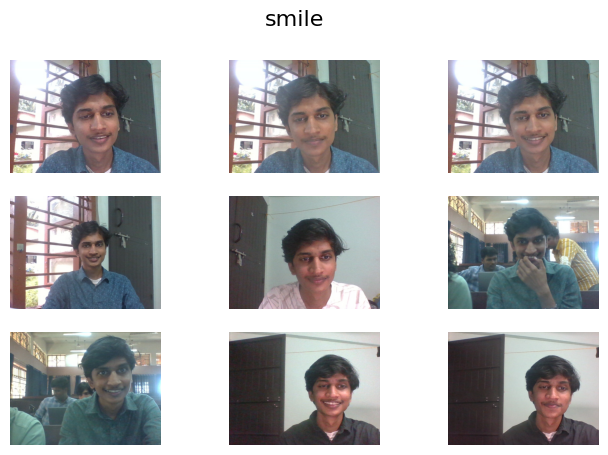

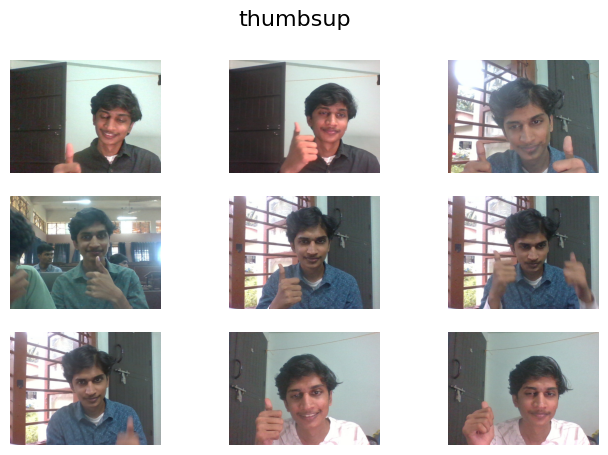

In [7]:
num_rows = 3
num_cols = 3
for label in labels:
    label_dir = os.path.join(image_dir, label)
    image_files = [f for f in os.listdir(label_dir) if f.endswith('.png') or f.endswith('.jpg')]

    num_images = min(num_rows * num_cols, len(image_files))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8,5))
    fig.suptitle(label, fontsize=16)
    
    for i in range(num_images):
        image_file = image_files[i]
        image_path = os.path.join(label_dir, image_file)
        image = PILImage.open(image_path)
        
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.imshow(image)
        ax.axis('off')

    plt.show()

# 4. Convert RGB to Grayscale

In [33]:
output_directory = 'Workspace/Images/GrayScale_Images'
os.makedirs(output_directory, exist_ok=True)

for label in labels:
    label_dir = os.path.join(image_dir, label)
    image_files = [f for f in os.listdir(label_dir) if f.endswith('.png') or f.endswith('.jpg')]

    num_images = min(num_rows * num_cols, len(image_files))

    for i in range(num_images):
        image_file = image_files[i]
        input_path = os.path.join(label_dir, image_file) 
        output_path = os.path.join(output_directory, image_file)

        image_rgb = cv2.imread(input_path)  
        if image_rgb is not None:
            image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

            gray_imgname = os.path.join(output_directory, label, f"{label}_{str(uuid.uuid1())}.jpg")
            os.makedirs(os.path.dirname(gray_imgname), exist_ok=True)  
            cv2.imwrite(gray_imgname, image_gray) 

            print(f"Converted {input_path} to grayscale and saved as {gray_imgname}") 
        else:
            print(f"Error reading {input_path}")
print("Conversion and saving completed.")


Converted Workspace/Images/Collected_Images\smile\smile.03cce364-3e8c-11ee-9a5c-988d46f0671f.jpg to grayscale and saved as Workspace/Images/GrayScale_Images\smile\smile_d00c3c36-3e95-11ee-8197-988d46f0671f.jpg
Converted Workspace/Images/Collected_Images\smile\smile.050e7f3e-3e8c-11ee-be00-988d46f0671f.jpg to grayscale and saved as Workspace/Images/GrayScale_Images\smile\smile_d0108447-3e95-11ee-aad8-988d46f0671f.jpg
Converted Workspace/Images/Collected_Images\smile\smile.064471b2-3e8c-11ee-9959-988d46f0671f.jpg to grayscale and saved as Workspace/Images/GrayScale_Images\smile\smile_d0142f40-3e95-11ee-a17a-988d46f0671f.jpg
Converted Workspace/Images/Collected_Images\smile\smile.de977a51-3e8b-11ee-ae51-988d46f0671f.jpg to grayscale and saved as Workspace/Images/GrayScale_Images\smile\smile_d0179fb2-3e95-11ee-b16f-988d46f0671f.jpg
Converted Workspace/Images/Collected_Images\smile\smile.e7f64a29-3e8d-11ee-a763-988d46f0671f.jpg to grayscale and saved as Workspace/Images/GrayScale_Images\smi

# 5. Display of RGB Converted Into GrayScale Images

In [9]:
gray_image_dir = "Workspace/Images/GrayScale_Images"

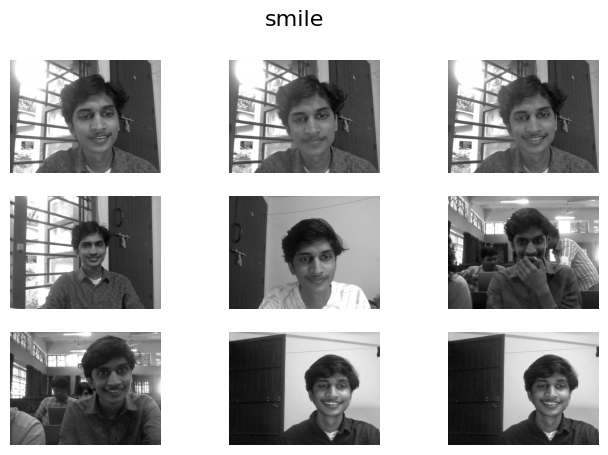

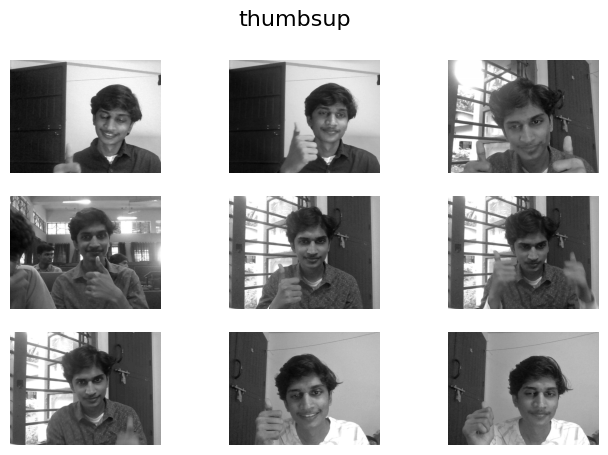

In [10]:
num_rows = 3
num_cols = 3

for label in labels:
    label_dir = os.path.join(gray_image_dir, label)
    image_files = [f for f in os.listdir(label_dir) if f.endswith('.png') or f.endswith('.jpg')]

    num_images = min(num_rows * num_cols, len(image_files))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 5))
    fig.suptitle(label, fontsize=16)
    
    for i in range(num_images):
        image_file = image_files[i]
        image_path = os.path.join(label_dir, image_file)
        image = PILImage.open(image_path)
        
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.imshow(image, cmap='gray')  
        ax.axis('off')

    plt.show()


# 6. Size of The Image

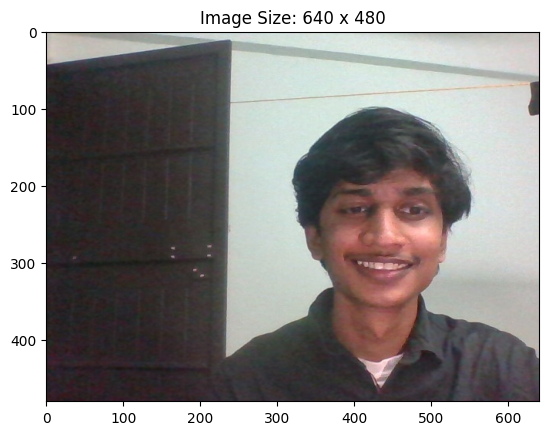

In [40]:
image_path = "Workspace/Images/Collected_Images"

image_files = [f for f in os.listdir(image_path) if f.endswith('.png') or f.endswith('.jpg')]

if image_files:
    image_file = image_files[0]
    image = PILImage.open(os.path.join(image_path, image_file))
    fig, ax = plt.subplots()
    ax.imshow(image)
    image_width, image_height = image.size
    plt.title(f"Image Size: {image_width} x {image_height}")
    ax.axis('on')
    plt.show()
else:
    print("No image files found in the specified path.")

# 7. Crop and Resize The Image

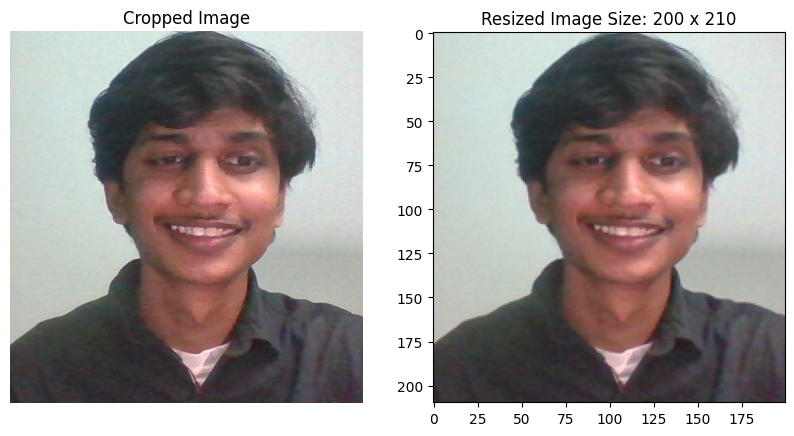

In [39]:
if image_files:
    cropped_image = image.crop((240, 100, 600, 480))

    new_size = (200, 210)  
    resized_image = cropped_image.resize(new_size)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(cropped_image)
    ax1.set_title("Cropped Image")
    ax1.axis('off')

    ax2.imshow(resized_image)
    image_width, image_height = resized_image.size
    plt.title(f"Resized Image Size: {image_width} x {image_height}")
    ax2.axis('on')

    plt.show()
else:
    print("No image files found in the specified path.")


# 8. Find Red, Green, Blue Color From Image

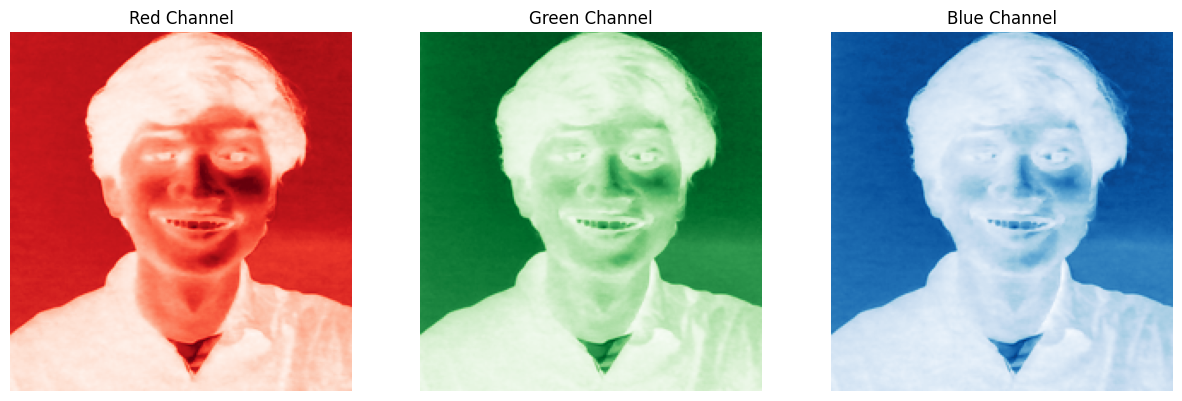

In [42]:
red_channel, green_channel, blue_channel = resized_image.split()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(red_channel, cmap='Reds')
ax1.set_title("Red Channel")
ax1.axis('off')

ax2.imshow(green_channel, cmap='Greens')
ax2.set_title("Green Channel")
ax2.axis('off')

ax3.imshow(blue_channel, cmap='Blues')
ax3.set_title("Blue Channel")
ax3.axis('off')

plt.show()


# 9. Brighten and Darken The Image

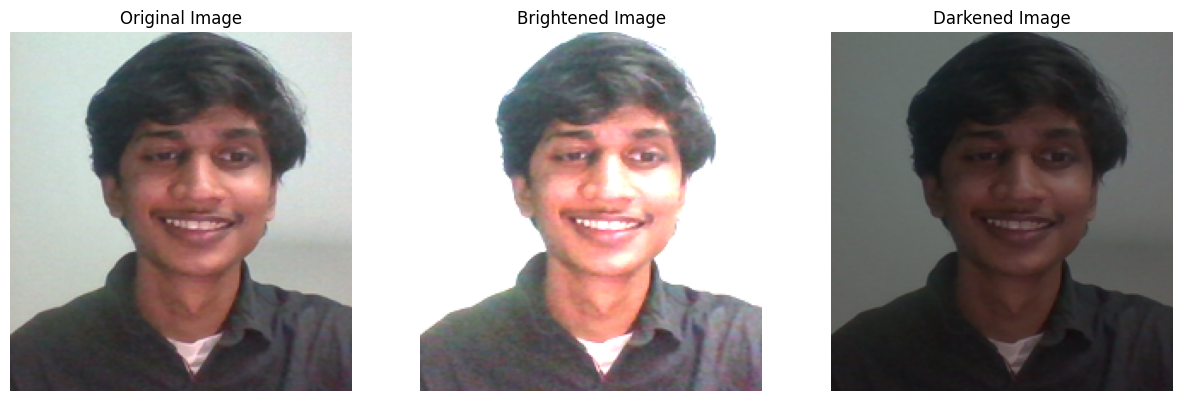

In [57]:
import os
from PIL import Image as PILImage, ImageEnhance
import matplotlib.pyplot as plt

def adjust_brightness(image, factor):
    
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)


# Brighten the image
brightened_image = adjust_brightness(resized_image, factor=1.7)  # Adjust the factor as needed

# Darken the image
darkened_image = adjust_brightness(resized_image, factor=0.5)  # Adjust the factor as needed

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(resized_image)
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(brightened_image)
ax2.set_title("Brightened Image")
ax2.axis('off')

ax3.imshow(darkened_image)
ax3.set_title("Darkened Image")
ax3.axis('off')

plt.show()


# 10. Adding Random Noise To The Image

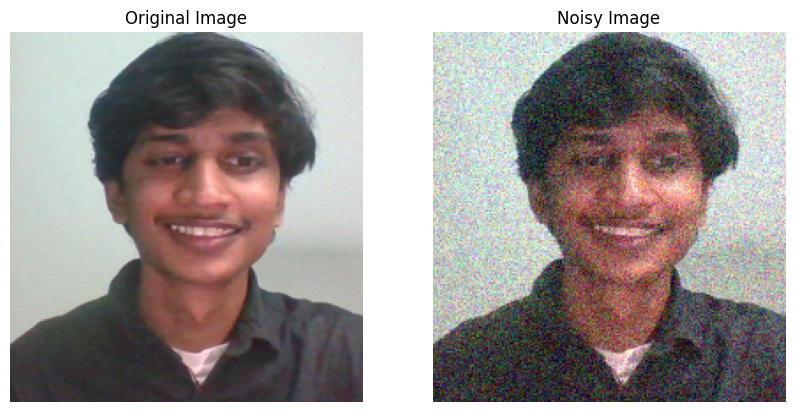

In [58]:
def add_gaussian_noise(image, mean=0, std=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, std, (row, col, ch))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)
   
image_np = np.array(resized_image)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image_np)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(resized_image)
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(noisy_image)
ax2.set_title("Noisy Image")
ax2.axis('off')

plt.show()